# Orthogonal Matching Pursuit (OMP)

### Restore Variable 

In [1]:
# import necessary module 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%store -r H 
%store -r Wopt
%store -r Fopt

%store -r Ns
%store -r Nt
%store -r Nr
%store -r Nc
%store -r Nray
%store -r realization
%store -r At
%store -r Ar

### Calculate FRF, FBB by OMP algorithm

In [2]:
def OMP(_Fopt,_NRF,_At):
    _FRF = np.empty((_At.shape[0],0))
    Fres = _Fopt
    for k in range(_NRF):
        PU = np.dot(_At.T,Fres)
        ind = np.argmax(np.sum((np.absolute(PU))**2,axis=1))
        _FRF = np.append(_FRF,_At[:,ind].reshape(-1,1),axis=1)
        _FBB = np.dot(np.linalg.pinv(_FRF),_Fopt)
        _Fopt = (_Fopt-np.dot(_FRF,_FBB))/np.linalg.norm((_Fopt-np.dot(_FRF,_FBB)),'fro')
    return _FRF,_FBB


In [3]:
print(H.shape)
print(Fopt.shape)
print(Wopt.shape)

(36, 144, 100)
(144, 3, 100)
(36, 3, 100)


### Plot Spectral Efficiency with Precoder and Combiner getting from OMP

C:\Users\dienh\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


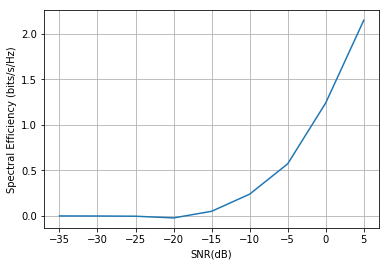

In [4]:
NRF = 3
SNR_dB = np.arange(-35,10,5)
SNR = 10**(SNR_dB/10)
smax = SNR.shape[0]
R = np.zeros((smax, realization),dtype=complex)

for reali in range(realization):
    FRF, FBB = OMP( Fopt[:,:,reali], NRF, At[:,:,reali] )
    FBB = np.sqrt(Ns)*FBB/np.linalg.norm(np.dot(FRF,FBB),'fro')
    WRF, WBB = OMP( Wopt[:,:,reali], NRF, Ar[:,:,reali])
    for s in range(smax):
        R[s,reali] = np.log2(np.linalg.det(np.eye(Ns)+SNR[s]/Ns*np.linalg.pinv(np.dot(WRF,WBB))@H[:,:,reali]@FRF@FBB.T@FRF.T@H[:,:,reali].T@WRF@WBB))
        
plt.plot(SNR_dB, np.sum(R,axis=1)/realization)
plt.xlabel('SNR(dB)')
plt.ylabel('Spectral Efficiency (bits/s/Hz)')
plt.grid()
plt.show()


In [5]:
# _At = At[:,:,1]
# print(_At.shape[0])
# test = _At[:,5].reshape(-1,1)
# print(test.shape)
# _Wopt = Wopt[:,:,1]
# _Ar = Ar[:,:,1]
# for s in range(smax):
#     print(s)
# np.zeros(2,2)
# A = np.arange(12).reshape(4,3)
# print(A)
# B = np.arange(3).reshape(3,1)
# C = A@B
# print(C)
